# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling



In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

A 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Train a Random forest classifier to help in predicting churn 

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
# Add model training in here!
model = RandomForestClassifier(n_estimators = 100, max_depth=30, random_state=0) # Add parameters to the model!
model.fit(X_train,y_train) # Complete this method call!

RandomForestClassifier(max_depth=30, random_state=0)

### Evaluation

Evaluate how well this trained model is able to predict the values of the test dataset.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predictions here!
y_pred_test = model.predict(X_test)


In [9]:
# Calculate performance metrics here!

# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9030668127053669

In [10]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[3281,    5],
       [ 349,   17]], dtype=int64)

In [11]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.77      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.84      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



I choose the accuracy and classification report metrics as my evaluation model because they help in giving an idea of how well the RF model predicts churn value. 

The model accuracy of 90% seems satisfactory. 

### Model understanding

In [12]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


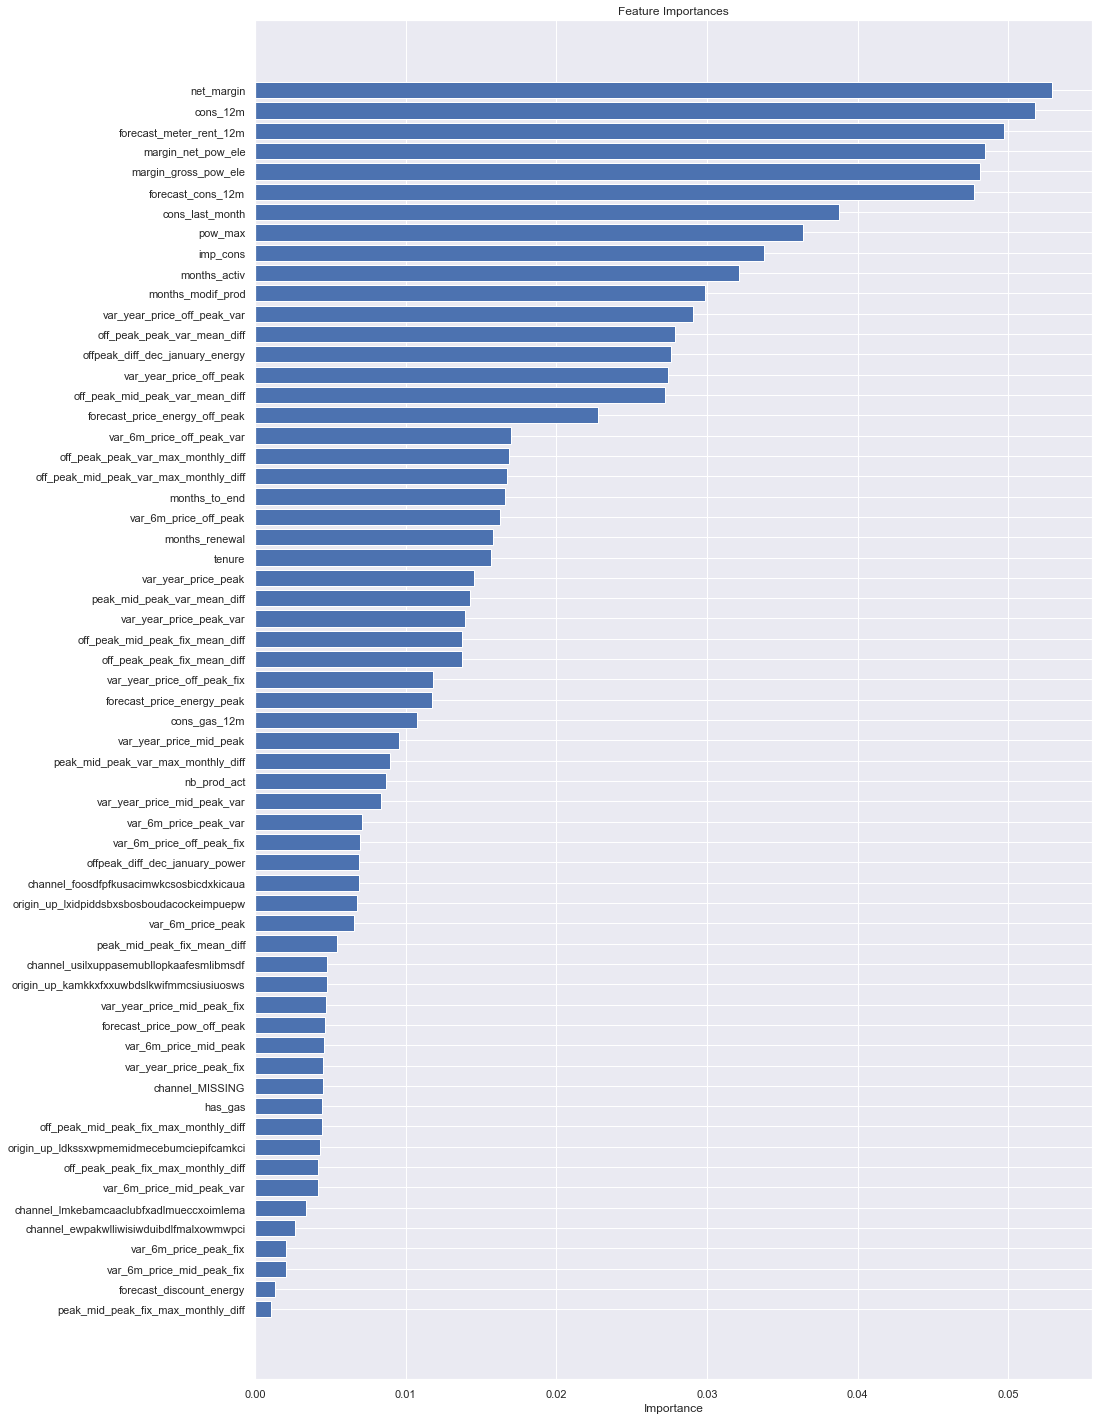

In [13]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, the following can be observed:

Net margin and consumption over 12 months is a top driver for churn in this model

Margin on power subscription also is an influential driver

Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract

Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor

In [14]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]
probabilities

array([0.09      , 0.22      , 0.06833631, ..., 0.1       , 0.06091958,
       0.11      ])

In [15]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [16]:
X_test['churn'] = y_pred_test.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [17]:
X_test['churn_probability']

0       0.090000
1       0.220000
2       0.068336
3       0.030000
4       0.030000
          ...   
3647    0.020000
3648    0.050185
3649    0.100000
3650    0.060920
3651    0.110000
Name: churn_probability, Length: 3652, dtype: float64